# Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [22]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [23]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
df.shape

(1025, 14)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [26]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [27]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<AxesSubplot:>

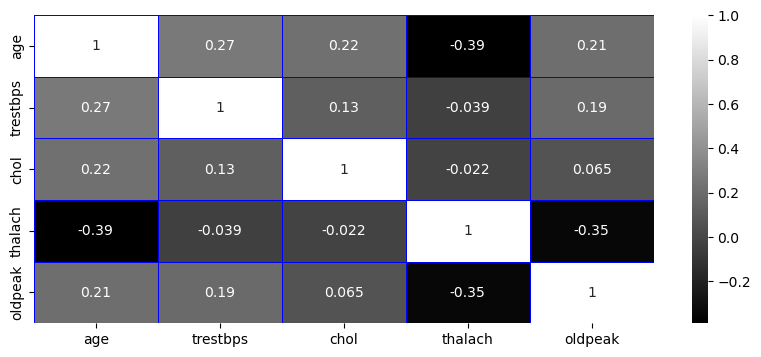

In [66]:
plt.figure(figsize=(10,4))
sb.heatmap(df.corr(),annot=True,linecolor='b',linewidths=.6,cmap='binary_r')

<Figure size 1000x800 with 0 Axes>

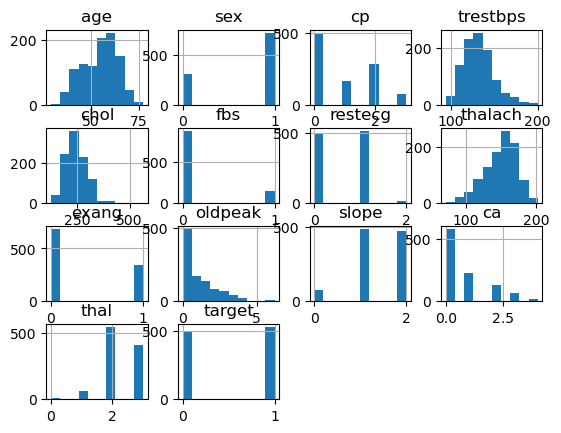

In [29]:
plt.figure(figsize=(10,8))
df.hist();

# EDA ( Exploratory  Data Analysis)

In [53]:
cat=[]
num=[]
for i in df.columns:
    if df[i].nunique()<30:
        cat.append(i)
    else:
        num.append(i)

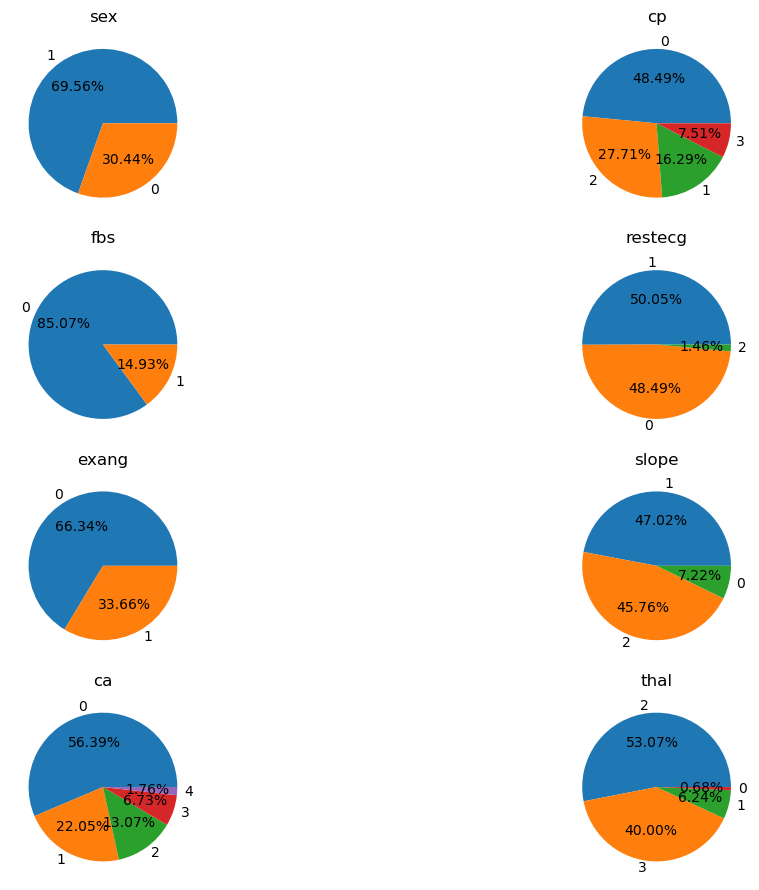

In [65]:
cat_cols=cat
num_col=2
num_rows=int(len(cat_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(15,9))
for col,ax in zip(cat_cols,axs.flatten()[:len(cat_cols)]):
    ax.pie(labels=df[col].value_counts().index,x=df[col].value_counts().values,autopct='%.2f%%')
    ax.set_title(col)

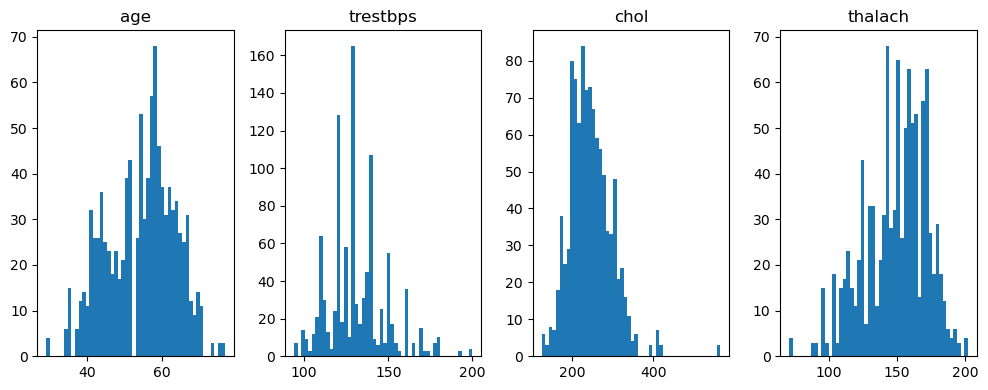

In [64]:
numerica_cols=num
num_col=4
bins=50
num_rows=int(len(numerica_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(10,4))
for col,ax in zip(numerica_cols,axs.flatten()[:len(numerica_cols)]):
    ax.hist(df[col],bins=bins)
    ax.set_title(col)

In [30]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [31]:
df['sex']=df['sex'].astype('category')
df['cp']=df['cp'].astype('category')
df['fbs']=df['fbs'].astype('category')
df['restecg']=df['restecg'].astype('category')
df['exang']=df['exang'].astype('category')
df['slope']=df['slope'].astype('category')
df['ca']=df['ca'].astype('category')
df['thal']=df['thal'].astype('category')
df['target']=df['target'].astype('category')

# Finding missing values

In [33]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
sex_dummy=pd.get_dummies(df['sex'],prefix='sex')
df_dummy=pd.concat([df,sex_dummy],axis=1)
df_dummy.drop(columns='sex',inplace=True)

cp_dummy=pd.get_dummies(df['cp'],prefix='cp')
df_dummy=pd.concat([df,cp_dummy],axis=1)
df_dummy.drop(columns='cp',inplace=True)

fbs_dummy=pd.get_dummies(df['fbs'],prefix='fbs')
df_dummy=pd.concat([df,fbs_dummy],axis=1)
df_dummy.drop(columns='fbs',inplace=True)

restecg_dummy=pd.get_dummies(df['restecg'],prefix='restecg')
df_dummy=pd.concat([df,restecg_dummy],axis=1)
df_dummy.drop(columns='restecg',inplace=True)

exang_dummy=pd.get_dummies(df['exang'],prefix='exang')
df_dummy=pd.concat([df,exang_dummy],axis=1)
df_dummy.drop(columns='exang',inplace=True)

slope_dummy=pd.get_dummies(df['slope'],prefix='slope')
df_dummy=pd.concat([df,slope_dummy],axis=1)
df_dummy.drop(columns='slope',inplace=True)

ca_dummy=pd.get_dummies(df['ca'],prefix='ca')
df_dummy=pd.concat([df,ca_dummy],axis=1)
df_dummy.drop(columns='ca',inplace=True)

thal_dummy=pd.get_dummies(df['thal'],prefix='thal')
df_dummy=pd.concat([df,thal_dummy],axis=1)
df_dummy.drop(columns='thal',inplace=True)

target_dummy=pd.get_dummies(df['target'],prefix='target')
df_dummy=pd.concat([df,target_dummy],axis=1)
df_dummy.drop(columns='target',inplace=True)



In [35]:
df_dummy.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target_0', 'target_1'],
      dtype='object')

In [17]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale_df=pd.DataFrame(scale.fit_transform(df),columns=df.columns)
scale_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667,1.0
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000,0.0
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667,0.0
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667,1.0


# Splitting dataset

In [36]:
x=df.drop(columns='target',axis=1)
y=df['target']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
model.score(x_train,y_train)

0.8658536585365854

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,RepeatedStratifiedKFold  #for finding the scores of cross-validations

In [41]:
model_LOG=LogisticRegression()
model_GAU=GaussianNB()
model_SVM=SVC()
model_KNN=KNeighborsClassifier()
model_DT=DecisionTreeClassifier()
model_ADA=AdaBoostClassifier()
model_GRA=GradientBoostingClassifier()
model_RAM=RandomForestClassifier()

In [42]:
model=[model_LOG,model_GAU,model_SVM,model_KNN,model_DT,model_ADA,model_GRA,model_RAM]
L,G,S,K,D,A,GR,RA=[],[],[],[],[],[],[],[]
splits=[1,3,5,7,9,11]
for i in splits:
    cv=KFold(n_splits=8,shuffle=True,random_state=42)
    for j in model:
        score=cross_val_score(j,x_train,y_train,cv=cv,n_jobs=-1)
        if j==model_LOG:
            L.append(score.mean())
        elif j==model_GAU:
            G.append(score.mean())
        elif j==model_SVM:
            S.append(score.mean())
        elif j==model_KNN:
            K.append(score.mean())
        elif j==model_DT:
            D.append(score.mean())
        elif j==model_ADA:
            A.append(score.mean())
        elif j==model_GRA:
            GR.append(score.mean())
        elif j==model_RAM:
            RA.append(score.mean())           

In [43]:
pd.DataFrame({'n:splits':splits,'LogisticRegression':L,'GaussianNB':G,'SVC':S,'KNeighborsClassifier':K,'DecisionTreeClassifier':D,'AdaBoostClassifier':A,'GradientBoostingClassifier':GR,'Ramdom_Forest':RA})


,n:splits,LogisticRegression,GaussianNB,SVC,KNeighborsClassifier,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,Ramdom_Forest
0,1,0.858521,0.830466,0.708452,0.729333,0.984140,0.934145,0.96101,0.992683
1,3,0.858521,0.830466,0.708452,0.729333,0.985366,0.934145,0.96101,0.989018
2,5,0.858521,0.830466,0.708452,0.729333,0.989006,0.934145,0.96101,0.989018
3,7,0.858521,0.830466,0.708452,0.729333,0.987793,0.934145,0.96101,0.993896
4,9,0.858521,0.830466,0.708452,0.729333,0.986579,0.934145,0.96101,0.990232
5,11,0.858521,0.830466,0.708452,0.729333,0.986579,0.934145,0.96101,0.990256


Random Forest is getting the best accuracy score of 99%.

# Predicting the values.

In [45]:
model_RAM.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_pred=model_RAM.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

# Model Evaluation 

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score,classification_report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# Evaluate ROC and AUC scores.

In [50]:
from sklearn.metrics import roc_auc_score
print('roc_auc_score',roc_auc_score(y_test,model_RAM.predict_proba(x_test)[:,1]))

roc_auc_score 1.0


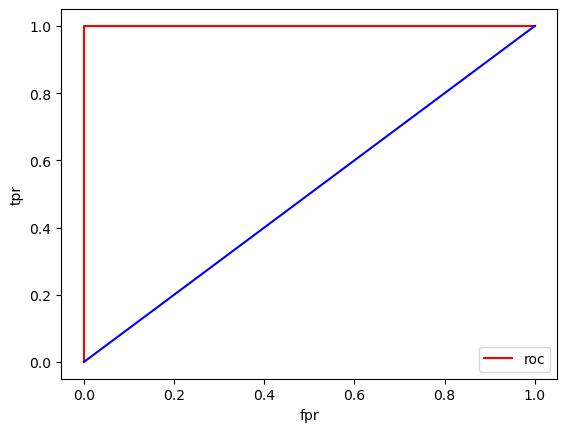

In [51]:
from sklearn.metrics import roc_curve,auc
a=model_RAM.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,a)
plt.plot(fpr,tpr,color='red',label='roc')
plt.plot([0,1],[0,1],color='blue',linestyle='-')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()